## Observations and Insights 

%matplotlib inLine

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

 # Check for duplicate mouse Ids 
mouse_unique = mouse_metadata["Mouse ID"].unique()
study_unique = study_results["Mouse ID"].unique()

    
# Combine the data into a single dataset
pyma_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])


# Display the data table for preview
pyma_complete.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
print(mouse_unique)
print(len(mouse_unique))

['k403' 's185' 'x401' 'm601' 'g791' 's508' 'f966' 'm546' 'z578' 'j913'
 'u364' 'n364' 'y793' 'r554' 'm957' 'c758' 't565' 'a644' 'i177' 'j989'
 'i738' 'a520' 'w914' 'r811' 'g288' 'i334' 'q610' 'd251' 'l897' 'c458'
 'b742' 'b128' 'j246' 'a411' 'j119' 'w150' 'v923' 'g316' 's710' 'l509'
 'r944' 'e662' 'u196' 'q597' 'a444' 'i557' 'r921' 'w678' 'y449' 'a203'
 'a251' 'a262' 'a275' 'a366' 'a401' 'a457' 'a492' 'a577' 'a685' 'a699'
 'a788' 'a818' 'a897' 'a963' 'b313' 'b447' 'b487' 'b559' 'b759' 'b879'
 'c139' 'c264' 'c282' 'c302' 'c326' 'c402' 'c559' 'c580' 'c757' 'c766'
 'c819' 'c832' 'c895' 'c927' 'd133' 'd164' 'd474' 'e213' 'e227' 'e291'
 'e476' 'e584' 'f129' 'f234' 'f278' 'f345' 'f394' 'f436' 'f545' 'f932'
 'f993' 'g107' 'g296' 'g497' 'g558' 'g570' 'g867' 'g989' 'h246' 'h333'
 'h428' 'h531' 'i386' 'i477' 'i635' 'i669' 'i901' 'j235' 'j296' 'j365'
 'j755' 'j984' 'k210' 'k382' 'k483' 'k510' 'k603' 'k754' 'k804' 'k862'
 'k894' 'l215' 'l264' 'l471' 'l490' 'l558' 'l661' 'l700' 'l725' 'l733'
 'l872

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_ID = pyma_complete.loc[pyma_complete.duplicated(subset=['Mouse ID','Timepoint']),"Mouse ID"].any()
print (duplicate_ID)


g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse = pyma_complete.loc [pyma_complete["Mouse ID"] =="g989"]
print(duplicate_mouse)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = pyma_complete.loc[pyma_complete["Mouse ID"] !="g989"]
print(clean_df)

     Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2           

In [6]:
# Checking the number of mice in the clean DataFrame.
print (len(clean_df["Mouse ID"].unique()))

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
means = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
var = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
summary_table = pd.DataFrame({"mean":means,"median":median,"variance":var,"standard deviation":std,"standard error":sem})

summary_table

# This method is the most straighforward, creating multiple series and putting them all together at the end.



,mean,median,variance,standard deviation,standard error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_table = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

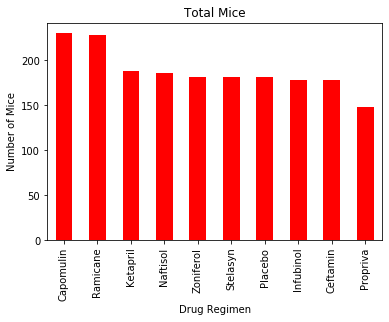

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_treatment = clean_df["Drug Regimen"].value_counts()
mice_treatment.plot(kind='bar', facecolor='red')
plt.title("Total Mice")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")

plt.show()

plt.tight_layout();


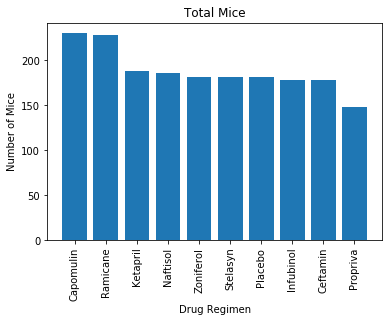

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
import matplotlib.pyplot as plt
mice_treatment = clean_df["Drug Regimen"].value_counts()

plt.bar(mice_treatment.index.values, mice_treatment.values)
        
plt.title("Total Mice")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.show()

plt.tight_layout();

In [11]:
mice_treatment

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

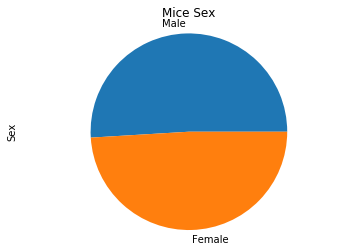

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_groups = clean_df["Sex"].value_counts()
mice_groups.plot(kind='pie')


plt.title("Mice Sex")

plt.axis("equal")
plt.show()

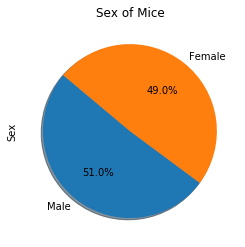

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt

mice_treatment = clean_df["Sex"].value_counts()

plt.pie(mice_treatment.values, labels=mice_treatment.index.values, autopct='%1.1f%%', shadow=True, startangle=140)

plt.title("Sex of Mice")
plt.ylabel("Sex")
plt.xticks(rotation = 90)
plt.show()

plt.tight_layout();

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

max_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max()
max_timepoint_df = max_timepoint.reset_index()
max_timepoint_df.head()

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df3=clean_df.merge(max_timepoint_df, on=["Mouse ID", "Timepoint"], how="right")
#clean_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])
df3

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [23]:
df3.set_index('Drug Regimen', "Mouse ID")


,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,45,22.050126,1
Capomulin,s185,Female,3,17,45,23.343598,1
Capomulin,x401,Female,16,15,45,28.484033,0
Capomulin,m601,Male,22,17,45,28.430964,1
Ramicane,g791,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...
Stelasyn,z314,Female,21,28,5,45.934712,0
Propriva,z435,Female,12,26,10,48.710661,0
Infubinol,z581,Female,24,25,45,62.754451,3


In [35]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

#Create for loop
for x in treatments:  # x = "Capomulin" 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = df3.loc[df3["Drug Regimen"] == x , 'Tumor Volume (mm3)']  #Generates a list

    # add tumor_value into list:  
    tumor_volume_list.append(tumor_volume)     # tumor_volume_list= [ [34, 66, 33, 22]   
    
    
    # Determine outliers using upper and lower bounds
       
    quartiles = tumor_volume.quantile([.25,.5,.75])  # stores three values in a list
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"-----------\n")
    print(f"The current treatment is {x}")
    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    print(f"The the median of tumor volume is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    outlier_tumor_volume = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
    print(f"outlier_tumor_volume {outlier_tumor_volume} the values are outliers.\n")

-----------

The current treatment is Capomulin
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
outlier_tumor_volume Series([], Name: Tumor Volume (mm3), dtype: float64) the values are outliers.

-----------

The current treatment is Ramicane
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
outlier_tumor_volume Series([], Name: Tumor Volume (mm3), dtype: float64) the values are outliers.

-----------

The current treatment is Infubinol
The lower quartile of tumor volume is:

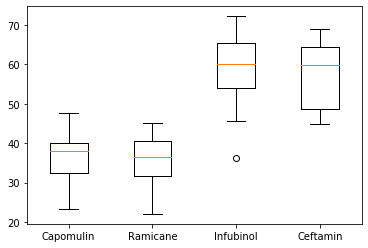

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
import matplotlib.pyplot as plt
plt.boxplot(tumor_volume_list, labels=treatments);


## Line and Scatter Plots

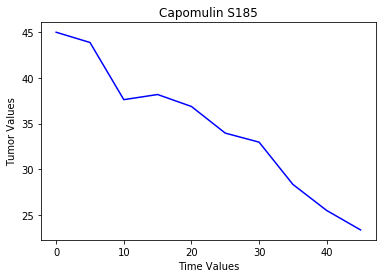

In [59]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_trial = clean_df[clean_df["Drug Regimen"] == "Capomulin" ]


# df3 = plt.plot(years, average_unemployment, color="blue", label="World Average" )
capomulin_trial3 = capomulin_trial[  capomulin_trial["Mouse ID"] =="s185"   ]


time_values= capomulin_trial3["Timepoint"]


tumor_values= capomulin_trial3["Tumor Volume (mm3)"]
tumor_values

plt.title("Capomulin S185")
plt.xlabel("Time Values")
plt.ylabel("Tumor Values")


plt.plot(time_values, tumor_values, color="blue", label="Capomulin S185" )


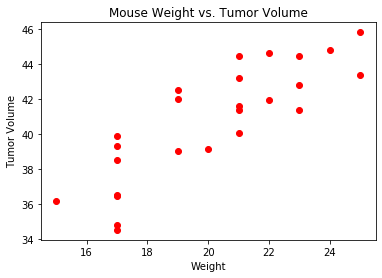

In [65]:
# Generate a scatter plot of average mouse weight versus average tumor volume for the Capomulin regimen
capomulin_trial = clean_df[clean_df["Drug Regimen"] == "Capomulin" ]


means = capomulin_trial.groupby("Mouse ID").mean()["Weight (g)"]
means2 = capomulin_trial.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]

# print(f"Average weight: {means}")
# print(f"Average tumor volume: {means2}")

plt.title("Mouse Weight vs. Tumor Volume")
plt.ylabel("Tumor Volume")
plt.xlabel("Weight")

plt.scatter(means, means2, marker="o", color="red")
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708717


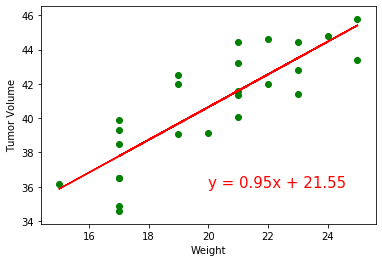

In [73]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Add x and y values to Linregress; it calculates slope, intercept, rvalue, pvalue, and standard deviation and stores these in those variables
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(means, means2)

# This is y=mx+b; we put in the xvalues as a list and it calculates each corresponding y value by using y=mx+b
# regress_values is a list of y values
regress_values = means * slope + intercept

# Generate line equation for plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Add line equation to plot
plt.annotate(line_eq,(20,36),fontsize=15,color="red")

#Add line graph of regression line to plot
plt.plot(means,regress_values,"r-")

#Add scatter plot to plot
plt.scatter(means, means2, marker="o", color="green")

#Add plot labels
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
print(f"The r-squared is: {rvalue**2}")



#Show both scatter and line plots
plt.show()

